In [1]:
import pandas as pd

In [2]:
file_path = '/projectnb/peaclab-mon/boztop/resource-allocation/datasets/KIT-FH2-2016-1.swf'

data = []

column_names = [
    'job_id', 'submit_time', 'wait_time', 'run_time', 'num_allocated_processors',
    'cpu_time', 'used_memory', 'req_num_processors', 'req_time', 'req_memory',
    'status', 'user_id', 'group_id', 'executable_number', 'queue_number', 'partition_number',
    'previous_job_id', 'think_time'
]

with open(file_path, 'r') as file:
    for line in file:
        if not line.startswith(';'):
            columns = line.split()
            data.append(columns)


df = pd.DataFrame(data, columns=column_names)
df = df.drop(index=0).reset_index(drop=True)


print(df.head())

  job_id submit_time wait_time run_time num_allocated_processors cpu_time  \
0      1           0         4    14400                      100       -1   
1      2          37         0    14400                      100       -1   
2      3       76068         9       45                       20       -1   
3      4      108213     16386      154                        1       -1   
4      5      108300     16977       50                        1       -1   

  used_memory req_num_processors req_time req_memory status user_id group_id  \
0          -1                100    14400         -1      1       1        1   
1          -1                100    14400         -1      1       1        1   
2          -1                 20     3600         -1      1       2        2   
3          -1                  1     3600         -1      1       3        3   
4          -1                  1     3600         -1      1       3        3   

  executable_number queue_number partition_number previo

In [3]:
desired_columns = [
    'job_id', 'submit_time', 'wait_time', 'run_time', 'num_allocated_processors',
    'req_num_processors', 'req_time', 'user_id']


df_filtered = df[desired_columns]
    
df_filtered

,job_id,submit_time,wait_time,run_time,num_allocated_processors,req_num_processors,req_time,user_id
0,1,0,4,14400,100,100,14400,1
1,2,37,0,14400,100,100,14400,1
2,3,76068,9,45,20,20,3600,2
3,4,108213,16386,154,1,1,3600,3
4,5,108300,16977,50,1,1,3600,3
...,...,...,...,...,...,...,...,...
114351,114352,50332603,1,92,20,20,600,45
114352,114353,50332628,3,49,20,20,300,150
114353,114354,50332673,7,65,1,1,600,45
114354,114355,50332719,10,49,1,1,600,45


In [4]:
print(f"Number of unique users: {df_filtered['user_id'].nunique()}")
print(f"Number of unique jobs: {df_filtered['job_id'].nunique()}")
      
num_jobs_more_req_time = (df_filtered['req_time'] > df_filtered['run_time']).sum()

print(f"Number of jobs where the user requested more execution time than actual: {num_jobs_more_req_time}")


Number of unique users: 166
Number of unique jobs: 114355
Number of jobs where the user requested more execution time than actual: 62065


/project/peaclab-mon/monitoring_venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/project/peaclab-mon/monitoring_venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


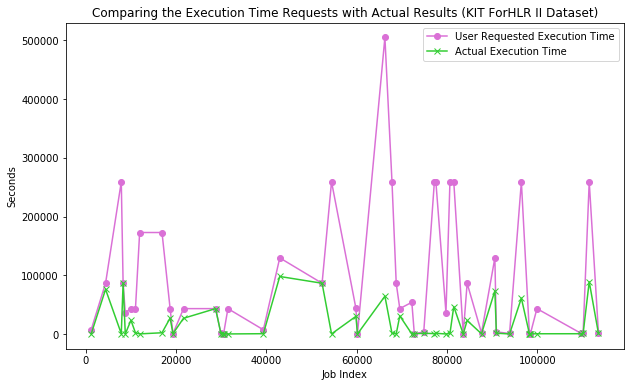

In [5]:
# LET'S VISUALIZE THE OVERPREDICTION FOR THE EXECUTION TIME
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Ensure the columns are numeric
df_filtered['req_time'] = pd.to_numeric(df_filtered['req_time'], errors='coerce')
df_filtered['run_time'] = pd.to_numeric(df_filtered['run_time'], errors='coerce')

random_indices = np.random.choice(df_filtered.index, size=50, replace=False)
random_indices_sorted = np.sort(random_indices)

plt.plot(df_filtered['req_time'].iloc[random_indices_sorted], label='User Requested Execution Time', marker='o', color='#DA70D6')
plt.plot(df_filtered['run_time'].iloc[random_indices_sorted], label='Actual Execution Time', marker='x', color='#32CD32')


plt.title('Comparing the Execution Time Requests with Actual Results (KIT ForHLR II Dataset)')
plt.xlabel('Job Index')
plt.ylabel('Seconds')


plt.legend()

save_path = '/projectnb/peaclab-mon/boztop/resource-allocation/plots/kit2_exec_time.png'  # Change this to your desired path
plt.savefig(save_path)

plt.show()

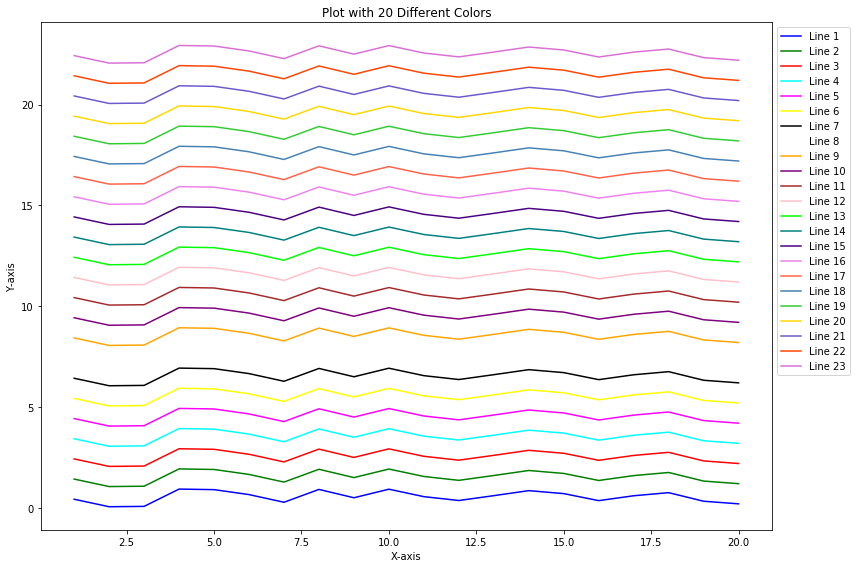

In [27]:
# Create some example data
x = np.arange(1, 21)
y = np.random.rand(20)

# List of colors
colors = [
    'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white',
    'orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'indigo', 'violet',
    '#FF6347', '#4682B4', '#32CD32', '#FFD700', '#6A5ACD', '#FF4500', '#DA70D6'
]

# Create the plot
plt.figure(figsize=(12, 8))

for i, color in enumerate(colors):
    plt.plot(x, y + i, label=f'Line {i+1}', color=color)

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot with 20 Different Colors')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()